# Initialization and build design matrix


In [1]:
from nilearn.glm.first_level import compute_regressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import math
import os
from nilearn import datasets, image

emotion_file = "../csv_output/500days_of_summer_EMOTIONS.csv"
df = pd.read_csv(emotion_file)

In [2]:
df['start_time'] = list(map(lambda x: math.ceil(x), df['start_time'] ))
df['end_time']  = list(map(lambda x: math.ceil(x), df['end_time'] ))
df['diff'] = np.diff(df.iloc[:,1:3])
df

,Unnamed: 0,start_time,end_time,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise,diff
0,0,62,66,This is a story of boy meets girl.,4,neutral,0.884392,0.003660,0.010187,0.003164,0.056004,0.884392,0.005289,0.037304,4
1,1,70,78,"The boy, Tom Hansen of Margate, New Jersey gre...",3,joy,0.710151,0.006280,0.005544,0.002888,0.710151,0.118338,0.091654,0.065146,8
2,2,78,86,This belief stemmed from early exposure to sad...,5,sadness,0.934445,0.003297,0.016433,0.006103,0.002715,0.030949,0.934445,0.006058,8
3,3,86,88,Elaine! Elaine!,6,surprise,0.365089,0.141201,0.014467,0.008606,0.360221,0.086305,0.024110,0.365089,2
4,4,88,93,"The girl, Summer finn of Shinnecock, Michigan ...",4,neutral,0.823927,0.010618,0.053457,0.012385,0.002992,0.823927,0.069859,0.026762,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,1292,5355,5359,What's this about I figured love would shine t...,4,neutral,0.649745,0.017027,0.004605,0.003271,0.027995,0.649745,0.017208,0.280148,4
1293,1293,5359,5362,"We've lost romance This world, its turns will ...",4,neutral,0.837589,0.004694,0.005800,0.003177,0.018543,0.837589,0.063418,0.066777,3
1294,1294,5362,5366,Open your mind Believe it's gonna come true,4,neutral,0.558628,0.082361,0.006238,0.025098,0.199932,0.558628,0.007455,0.120289,4
1295,1295,5366,5369,Keep romance alive and hope she's gonna tell you,4,neutral,0.586772,0.014756,0.004861,0.003368,0.369380,0.586772,0.008724,0.012140,3


In [3]:
all_start_time = np.repeat(df['start_time'].to_numpy()[np.newaxis,:],7,axis=0).flatten().tolist()
all_diff = np.repeat(df['diff'].to_numpy()[np.newaxis,:],7,axis=0).flatten().tolist()
emo = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
all_emotions = np.repeat(emo,df.shape[0]).tolist()
amp = np.hstack((df['anger'], df['disgust'], df['fear'], df['joy'], df['neutral'], df['sadness'], df['surprise'])).tolist()

In [4]:
from nilearn.glm.first_level import make_first_level_design_matrix

conditions = df['label'].tolist()
duration =df['diff'].tolist()
# these are the corresponding onset times
onsets = df['start_time'].tolist()

events = pd.DataFrame(
    {"trial_type": all_emotions, 
     "onset": all_start_time, 
     "duration": all_diff,
    "modulation": amp
     }
)

frame_times = np.linspace(df['start_time'].iloc[0],  df['end_time'].iloc[-1], df['end_time'].iloc[-1] - df['start_time'].iloc[0] +1)

In [5]:
from nilearn.glm.first_level import make_first_level_design_matrix, compute_regressor

hrf_model = "glover" 
# HRF model from SPM (default)
# linear combination of two gamma functions, time lenght 32s, onset 0s
#kernel_width = 20.0
'''
hrf_custom = compute_regressor(
    frame_times,
    events,
    hrf_model='glover',
    oversampling=50,  # Increase for better resolution
    kernel_width=20.0  # Approximate width in seconds
)
'''

X1 = make_first_level_design_matrix(
    frame_times,
    events,
    drift_model="polynomial",
    drift_order=3,
    hrf_model=hrf_model,
)

/tmp/ipykernel_11055/2852744750.py:17: UserWarning: The following conditions contain events with null duration:
- 'anger'
- 'disgust'
- 'fear'
- 'joy'
- 'neutral'
- 'sadness'
- 'surprise'

  X1 = make_first_level_design_matrix(


[make_first_level_design_matrix] A 'modulation' column was found in the given events data and is used.

/tmp/ipykernel_11055/2852744750.py:17: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  X1 = make_first_level_design_matrix(


In [6]:
X1

,anger,disgust,fear,joy,neutral,sadness,surprise,drift_1,drift_2,drift_3,constant
62.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.494234,0.162814,-0.048263,1.0
63.0,0.000002,0.000005,0.000002,0.000027,0.000428,0.000003,0.000018,-0.494048,0.162630,-0.048154,1.0
64.0,0.000078,0.000217,0.000067,0.001192,0.018831,0.000113,0.000794,-0.493862,0.162446,-0.048045,1.0
65.0,0.000481,0.001338,0.000416,0.007357,0.116185,0.000695,0.004901,-0.493676,0.162263,-0.047936,1.0
66.0,0.001365,0.003799,0.001180,0.020884,0.329800,0.001972,0.013911,-0.493490,0.162079,-0.047827,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5372.0,0.080799,0.030037,0.015452,0.404660,0.468522,-0.003259,0.003796,0.493490,0.162079,0.047827,1.0
5373.0,0.116410,0.074593,0.011038,0.362550,0.420346,0.002944,0.012118,0.493676,0.162263,0.047936,1.0
5374.0,0.177252,0.135722,0.009112,0.265348,0.359526,0.013544,0.039497,0.493862,0.162446,0.048045,1.0
5375.0,0.245000,0.197706,0.009229,0.147179,0.299833,0.025181,0.075873,0.494048,0.162630,0.048154,1.0


/tmp/ipykernel_11055/3068189814.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


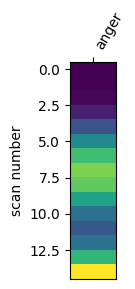

In [7]:
from nilearn.plotting import plot_design_matrix, plot_design_matrix_correlation
plot_design_matrix(X1.iloc[0:15, 0:1])

plt.tight_layout()
plt.show()

# extract brain fMRI and ROI seed

In [8]:
from function.atlas_masking import AtlasMaskGenerator

fmri_dir = "//wsl.localhost/Ubuntu/home/jirapong/brain_im/"
tr = 1.0
base_out_path = "../masks_insular_amygdala/"
amyg_subcortical_atlas='sub-maxprob-thr25-1mm'
cortical_atlas = 'cort-maxprob-thr25-1mm'

movie = "500daysofsummer"
fmri_vox = []

if len(os.listdir(base_out_path)) == 0:
    print("Running the extraction")
    amygdala_mask = AtlasMaskGenerator(atlas_type=amyg_subcortical_atlas, output_dir= base_out_path)
    insular_mask = AtlasMaskGenerator(atlas_type=cortical_atlas, output_dir= base_out_path)

    if not os.path.isdir(base_out_path):
        os.mkdir(base_out_path)

    for dir in os.listdir(fmri_dir):
        path_ = os.path.join(fmri_dir,dir)
        
        if os.path.isdir(path_):
            subject_id = dir

            func_img_path = path_ +"/func/" + subject_id + "_task-" + movie + "_bold_blur_censor_ica.nii.gz"
            if not os.path.exists(func_img_path):
                print(f"Movie {movie} not found in {subject_id} ")
                continue
            else: 
                #fmri = fMRIBOLD(dir_path=func_img_path, t_r=tr, out_path=base_out_path)
                masked_amg = amygdala_mask.generate_masks(fmri_path= func_img_path, target_labels=["amygdala"], t_r= tr )
                masked_ins = insular_mask.generate_masks(fmri_path= func_img_path, target_labels=["insular"], t_r= tr)

                df = np.array(list(masked_amg[2].values())).transpose(1, 0, 2)  # New shape: (5470, 2, 189)
                masked_amg = df.reshape(df.shape[0], df.shape[1] * df.shape[2]) 

                vox_ts = np.hstack((masked_amg,masked_ins[2]['Insular Cortex']))
                vox_ts = vox_ts[62:5377] # need to identify manually
                fmri_vox.append(vox_ts)
        print(f"Processed {subject_id}: Masks generated ")

    path = "../extracted_voxel/"
    np.save( path + movie +'.npy', np.array(fmri_vox))

else:
    print("Mask image detected, skipping mask generation")


Mask image detected, skipping mask generation


In [9]:
# extracting the voxel time series from the saved numpy array
vox_path = "../extracted_voxel/500daysofsummer.npy"
vox = np.load(vox_path)
vox.shape

(20, 5315, 1163)

# Applying sliding window, match timeseries with HRF peak

first onset time = 62 => 5 second for the first peak = 67 

the next onset time 63 => 68 peak 

and so on ...

#TODO check the peak time (5.4)

## Memmap dataset loading

In [10]:
X_all = vox.reshape(-1, vox.shape[-1])

Y = X1.iloc[:, 0:7].to_numpy()
Y_all = np.tile(Y, (vox.shape[0], 1))

X_all.shape, Y_all.shape, Y.shape , vox.shape

((106300, 1163), (106300, 7), (5315, 7), (20, 5315, 1163))

In [11]:
sliding_window_size = 32  
window_step = 1  
start_onset = 1
peak_time = 5 #TODO
num_timepoints = vox.shape[1]
num_windows = (num_timepoints- start_onset - sliding_window_size) // window_step + 1
print(f"Number of windows: {num_windows}")  

Number of windows: 5283


In [12]:
import numpy as np
import torch
from torch.utils.data import Dataset, Subset, DataLoader
from numpy.lib.stride_tricks import sliding_window_view
from sklearn.model_selection import train_test_split

def process_windows_generator(vox, Y, sliding_window_size, window_step, peak_time, batch_size=1000, vox_min=None, vox_max=None):
    n_subjects, num_timepoints, n_voxels = vox.shape
    start_inds = np.arange(1, num_timepoints - sliding_window_size + 1, window_step)
    n_windows = len(start_inds)
    
    label_time_indices = start_inds + peak_time
    assert label_time_indices.max() < len(Y), "peak_time goes out of range"
    Y_per_window = Y[label_time_indices]  # (n_windows, n_classes)
    
    for batch_start in range(0, n_windows, batch_size):
        batch_end = min(batch_start + batch_size, n_windows)
        batch_indices = start_inds[batch_start:batch_end]
        
        batch_windows = sliding_window_view(vox, window_shape=sliding_window_size, axis=1)
        selected = batch_windows[:, batch_indices, :, :]  # (n_subjects, batch_size, sliding_window_size, n_voxels)
        #windowed_X_batch = selected.reshape(-1, sliding_window_size, n_voxels)  # (n_subjects * batch_size, sliding_window_size, n_voxels)
        windowed_X_batch = selected
        
        # Normalize: Scale to [0, 1] then standardize
        # normalized later during training  
        #if vox_min is not None and vox_max is not None:
        #    windowed_X_batch = (windowed_X_batch - vox_min) / (vox_max - vox_min + 1e-8)  # [0, 1]
        
        Y_batch = Y_per_window[batch_start:batch_end]  # (batch_size, n_classes)
        Y_windowed_batch = np.tile(Y_batch, (n_subjects, 1, 1))  # (n_subjects, batch_size, n_classes)
        
        yield windowed_X_batch, Y_windowed_batch, batch_start, batch_end

def save_to_memmap(vox, Y, sliding_window_size, window_step, peak_time, batch_size, x_file='windowed_X.dat', y_file='Y_windowed.dat'):
    n_subjects, num_timepoints, n_voxels = vox.shape
    n_windows = len(np.arange(1, num_timepoints - sliding_window_size + 1, window_step))
    #n_samples = n_subjects * n_windows
    n_classes = Y.shape[1]

    #delete batch size, vox min, vox
    # Compute normalization parameters
    vox_min = vox.min(axis=(0, 1), keepdims=True)  # Shape: (1, 1, n_voxels)
    vox_max = vox.max(axis=(0, 1), keepdims=True)  # Shape: (1, 1, n_voxels)
    
    # Initialize memory-mapped arrays
    windowed_X_mm = np.memmap(x_file, dtype=np.float32, mode='w+', shape=(n_subjects ,n_windows, n_voxels, sliding_window_size))
    Y_windowed_mm = np.memmap(y_file, dtype=np.float32, mode='w+', shape=(n_subjects ,n_windows, n_classes))
    
    # Populate memory-mapped arrays with normalized data
    for windowed_X_batch, Y_windowed_batch, batch_start, batch_end in process_windows_generator(
        vox, Y, sliding_window_size, window_step, peak_time, batch_size, vox_min, vox_max
    ):
        batch_size_actual = batch_end - batch_start
        start_idx = batch_start 
        end_idx = start_idx + batch_size_actual 
        windowed_X_mm[:,start_idx:end_idx,:,:] = windowed_X_batch
        Y_windowed_mm[:,start_idx:end_idx,:] = Y_windowed_batch
    
    return windowed_X_mm, Y_windowed_mm

class EmotionDataset(Dataset):
    def __init__(self, x_memmap, y_memmap, indices=None):
        self.x_memmap = x_memmap
        self.y_memmap = y_memmap
        self.indices = indices if indices is not None else np.arange(len(x_memmap))
    
    def __len__(self):
        return len(self.indices)
    
    def __getitem__(self, idx):
        actual_idx = self.indices[idx]
        X_item = torch.from_numpy(self.x_memmap[actual_idx]).float().unsqueeze(0)  # [1, 32, n_voxels]
        y_item = torch.from_numpy(self.y_memmap[actual_idx]).float()  # [n_classes]
        return X_item, y_item

In [ ]:
vox = np.ascontiguousarray(vox, dtype=np.float32)  # Ensure contiguous and float32
sliding_window_size = 32
window_step = 1
peak_time = 5
batch_size = 1000
test_frac = 0.10
val_frac = 0.10
random_state = 25
num_workers = 0
pin_memory = True
dataloader_batch_size = 64

# Normalize labels if not probabilities
if not np.allclose(Y.sum(axis=1), 1.0, atol=1e-5):
    Y = (Y - Y.min(axis=0, keepdims=True)) / (Y.max(axis=0, keepdims=True) - Y.min(axis=0, keepdims=True) + 1e-8)

# Save normalized data to memory-mapped files
windowed_X_mm, Y_windowed_mm = save_to_memmap(
    vox, Y, sliding_window_size, window_step, peak_time, batch_size,
    x_file='windowed_X.dat', y_file='Y_windowed.dat'
)


In [ ]:
windowed_X_mm.shape, Y_windowed_mm.shape

((20, 5283, 1163, 32), (20, 5283, 7))

In [ ]:
Y_windowed = np.array(Y_windowed_mm)
Y_one_class = np.argmax(Y_windowed, axis=-1)[:, :, np.newaxis]
n_subjects ,n_windows, n_classes = Y_one_class.shape
y_one_class_file ='Y_windowed_oneclass.dat'
Y_one_class_mm = np.memmap(y_one_class_file, dtype=np.float32, mode='w+', shape=(n_subjects ,n_windows, n_classes))
Y_one_class_mm[:] = Y_one_class[:]


## independent / response variable distribution visualization

/tmp/ipykernel_1134/2572809789.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_ = skew(Y_windowed_mm) # > 1 = sjewed right, < -1 = skewed left
/tmp/ipykernel_1134/2572809789.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ex_kurt = kurtosis(Y_windowed_mm, fisher= True)  # > 0 = heavy tails, < 0 = light tails


Skewness: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Kurtosis: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Mean: [[0.23577735 0.23888795 0.22721465 ... 0.58335143 0.21247546 0.2557642 ]
 [0.23618409 0.23998544 0.22752015 ... 0.644765   0.21295018 0.2592359 ]
 [0.23600335 0.23949763 0.22738437 ... 0.61746854 0.21273915 0.25769284]
 ...
 [0.18590665 0.19050115 0.22483823 ... 0.5177332  0.21850327 0.40388146]
 [0.1677497  0.1778441  0.2242823  ... 0.56934255 0.2243598  0.39340156]
 [0.16344362 0.17578939 0.22451715 ... 0.6108464  0.23259398 0.36289704]], Median: [[0.23577732 0.23888795 0.22721468 ... 0.5833515  0.21247546 0.25576425]
 [0.2361841  0.23998545 0.22752014 ... 0.6447651  0.21295013 0.2

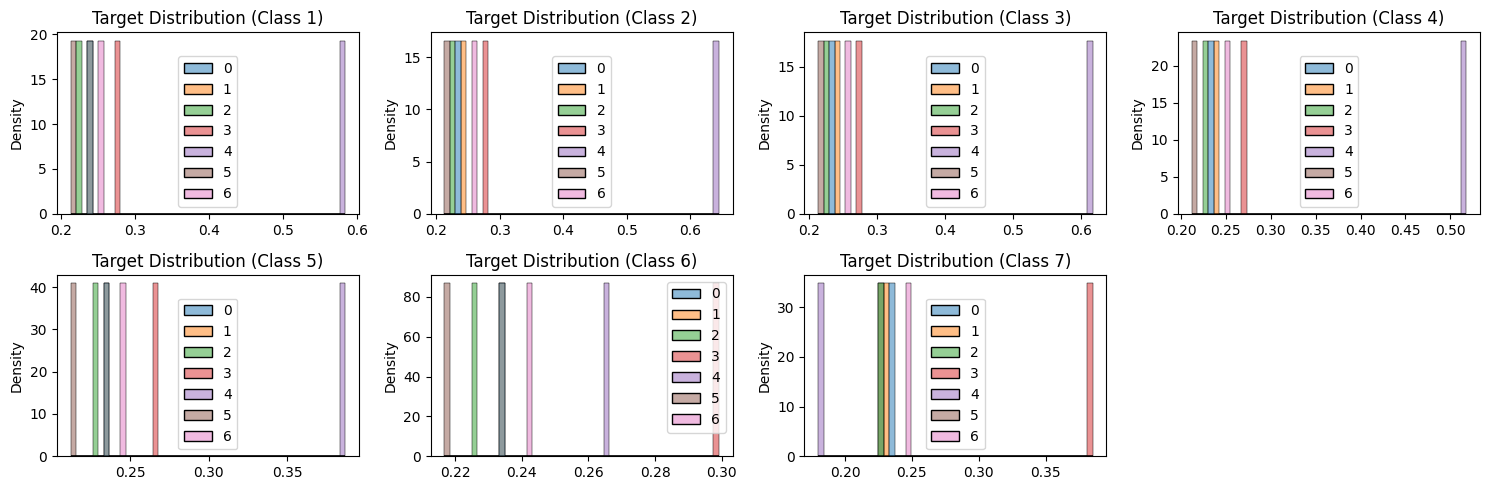

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns  # For KDE; install if needed, but optional

skew_ = skew(Y_windowed_mm) # > 1 = sjewed right, < -1 = skewed left
ex_kurt = kurtosis(Y_windowed_mm, fisher= True)  # > 0 = heavy tails, < 0 = light tails

# Assume y is your target array
print(f"Skewness: {skew_}")
print(f"Kurtosis: {ex_kurt}")
print(f"Mean: {np.mean(Y_windowed_mm, axis = 0)}, Median: {np.median(Y_windowed_mm,axis = 0)}")
# Assuming Y_windowed_mm is your memory-mapped array (105660, 7)
n_classes = 7
plt.figure(figsize=(15, 5))
for i in range(n_classes):
    y_i = Y_windowed_mm[:, i]  # Access one column (105660,)
    plt.subplot(2, 4, i+1)
    sns.histplot(y_i, bins=50, kde=True, stat="density")
    plt.title(f"Target Distribution (Class {i+1})")
plt.tight_layout()
plt.show()

1. Result shows that all emotions except neutral has a positive skewness reflecting a positive long tail of less frequent but high value of HRF response.
2. Kurtosis also suggest a heavy tail suggesting that it has more outliers and extreme values than a normal distribution


These two factors indicates skewed distribution with long tail indicating a few observation of high HRF response peak. This could pose a chanllenge in regresion task



## data preprocessing

## split data and create dataLoader

In [ ]:
from torch.utils.data import Subset, DataLoader

full_dataset = EmotionDataset(windowed_X_mm, Y_windowed_mm)
train_dataset = Subset(full_dataset, train_idx)
val_dataset = Subset(full_dataset, val_idx)
test_dataset = Subset(full_dataset, test_idx)

# Create DataLoaders
train_loader = DataLoader(
    train_dataset, batch_size=dataloader_batch_size, shuffle=True,
    num_workers=num_workers, pin_memory=pin_memory
)
val_loader = DataLoader(
    val_dataset, batch_size=dataloader_batch_size, shuffle=False,
    num_workers=num_workers, pin_memory=pin_memory
)
test_loader = DataLoader(
    test_dataset, batch_size=dataloader_batch_size, shuffle=False,
    num_workers=num_workers, pin_memory=pin_memory
)

# Verify
assert len(train_dataset) == len(train_idx)
assert len(val_dataset) == len(val_idx)
assert len(test_dataset) == len(test_idx)
print("Done. Example: first train indices:", train_idx[:10])

# Test a batch
for X_batch, y_batch in train_loader:
    print(f"Batch X shape: {X_batch.shape}, Batch y shape: {y_batch.shape}")
    print(f"Batch X mean: {X_batch.mean().item():.4f}, std: {X_batch.std().item():.4f}")
    print(f"Batch y sum: {y_batch.sum(dim=1)[:5]}")
    break

Done. Example: first train indices: [34910 88037 77888  4124 34048  5648 90652 12368 61167 10335]
Batch X shape: torch.Size([64, 1, 32, 1163]), Batch y shape: torch.Size([64, 7])
Batch X mean: 0.5005, std: 0.1061
Batch y sum: tensor([1.5540, 2.0220, 1.8785, 2.2465, 2.0793])


In [19]:
Y_windowed_mm.shape, windowed_X_mm.shape

((105660, 7), (105660, 32, 1163))

# train model

## evaluation and train function

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
def evaluate_loss(model, dataloader, criterion, device=torch.device("cpu"), return_preds=False):
    """
    Run model in eval mode on dataloader and compute:
      - mean MSE loss (criterion)
      - mean MAE
      - RMSE (sqrt of MSE)
    Returns: dict {"mse": , "mae": , "rmse": , "n_samples": } and optionally (preds, targets)
    """
    model.eval()
    mse_sum = 0.0
    mae_sum = 0.0
    n_total = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for xb, yb in dataloader:
            xb = xb.to(device, dtype=torch.float32)
            yb = yb.to(device, dtype=torch.float32)

            preds = model(xb)                    # shape [B, out_dim]
            loss = criterion(preds, yb)          # typically MSELoss

            B = yb.shape[0]
            mse_sum += loss.item() * B
            mae_sum += torch.mean(torch.abs(preds - yb)).item() * B
            n_total += B

            if return_preds:
                all_preds.append(preds.detach().cpu())
                all_targets.append(yb.detach().cpu())

    if n_total == 0:
        return {"mse": None, "mae": None, "rmse": None, "n_samples": 0}

    mse = mse_sum / n_total
    mae = mae_sum / n_total
    rmse = math.sqrt(mse)

    result = {"mse": mse, "mae": mae, "rmse": rmse, "n_samples": n_total}
    if return_preds:
        preds_all = torch.cat(all_preds, dim=0)
        targs_all = torch.cat(all_targets, dim=0)
        return result, preds_all, targs_all
    return result

In [21]:

import math
from time import time
from copy import deepcopy

def train_model(model,
                train_loader,
                val_loader,
                optimizer,
                device,
                criterion=nn.MSELoss(),
                epochs=50,
                scheduler=None,
                grad_clip=None,
                save_best_path=None,
                print_every=1):
    """
    Standard training loop for regression with epoch-level printing.
    - model: PyTorch model
    - train_loader/val_loader: DataLoader yielding (xb, yb) where xb shape matches model input
    - optimizer: e.g. torch.optim.Adam(model.parameters(), lr=1e-3)
    - criterion: loss function (default MSE)
    - scheduler: optional LR scheduler; if provided, called per epoch with scheduler.step(val_mse) or scheduler.step()
    - grad_clip: float or None -> clips gradients by norm if provided
    - save_best_path: filepath string to save best model (by val mse)
    - returns: history dict with lists of metrics
    """
    model.to(device)
    history = {
        "train_mse": [], "train_mae": [], "train_rmse": [],
        "val_mse": [], "val_mae": [], "val_rmse": []
    }

    best_val_mse = float("inf")
    best_state = None

    for epoch in range(1, epochs+1):
        t0 = time()
        # ----- training -----
        model.train()
        train_mse_sum = 0.0
        train_mae_sum = 0.0
        train_n = 0

        for xb, yb in train_loader:
            xb = xb.to(device, dtype=torch.float32)
            yb = yb.to(device, dtype=torch.float32)

            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()

            if grad_clip is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

            optimizer.step()

            B = yb.shape[0]
            train_mse_sum += loss.item() * B
            train_mae_sum += torch.mean(torch.abs(preds - yb)).item() * B
            train_n += B

        train_mse = train_mse_sum / train_n
        train_mae = train_mae_sum / train_n
        train_rmse = math.sqrt(train_mse)

        # ----- validation -----
        val_res = evaluate_loss(model, val_loader, criterion, device=device, return_preds=False)

        # occasionally step scheduler; many schedulers expect a val metric; handle both cases
        if scheduler is not None:
            try:
                # if ReduceLROnPlateau expects metric
                scheduler.step(val_res["mse"])
            except TypeError:
                # standard scheduler (step each epoch)
                scheduler.step()

        # ----- logging & checkpointing -----
        history["train_mse"].append(train_mse)
        history["train_mae"].append(train_mae)
        history["train_rmse"].append(train_rmse)
        history["val_mse"].append(val_res["mse"])
        history["val_mae"].append(val_res["mae"])
        history["val_rmse"].append(val_res["rmse"])

        # save best
        if val_res["mse"] < best_val_mse:
            best_val_mse = val_res["mse"]
            best_state = deepcopy(model.state_dict())
            #if save_best_path is not None:
                #torch.save(best_state, save_best_path)
            torch.save(model, save_best_path) 

        if epoch % print_every == 0:
            t1 = time()
            print(f"Epoch {epoch:3d}/{epochs} | time: {t1-t0:5.2f}s "
                  f"| train_mse: {train_mse:.6f}, train_mae: {train_mae:.6f} "
                  f"| val_mse: {val_res['mse']:.6f}, val_mae: {val_res['mae']:.6f}")

    # load best weights (optional)
    if best_state is not None:
        model.load_state_dict(best_state)

    return model, history

## new eval and train funbction

In [ ]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

def evaluate_loss(model, dataloader, criterion, device=torch.device("cpu"), return_preds=False):
    """
    Run model in eval mode on dataloader and compute:
      - mean criterion (e.g. SmoothL1Loss) averaged per sample
      - mean MSE (computed directly)
      - mean MAE (computed directly)
      - RMSE = sqrt(MSE)
    Returns: dict {"criterion": , "mse": , "mae": , "rmse": , "n_samples": } and optionally (preds, targets)
    """
    model.eval()
    criterion_sum = 0.0   # sum over samples of the criterion (we'll divide by n_total later)
    mse_sum = 0.0
    mae_sum = 0.0
    n_total = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for xb, yb in dataloader:
            xb = xb.to(device, dtype=torch.float32)
            yb = yb.to(device, dtype=torch.float32)

            preds = model(xb)                    # shape [B, out_dim] (or [B, ...])
            loss = criterion(preds, yb)          # may be scalar or per-element tensor

            # robustly get a *per-batch mean* scalar for the criterion:
            # if loss is scalar this is just that scalar; if loss is per-element, mean() makes it scalar.
            criterion_batch_mean = float(loss.mean().detach().cpu().item())

            # compute mse and mae per-batch directly from preds/yb
            diff = preds - yb
            mse_batch_mean = float((diff ** 2).mean().detach().cpu().item())
            mae_batch_mean = float(torch.abs(diff).mean().detach().cpu().item())

            B = yb.shape[0]
            criterion_sum += criterion_batch_mean * B
            mse_sum += mse_batch_mean * B
            mae_sum += mae_batch_mean * B
            n_total += B

            if return_preds:
                all_preds.append(preds.detach().cpu())
                all_targets.append(yb.detach().cpu())

    if n_total == 0:
        return {"criterion": None, "mse": None, "mae": None, "rmse": None, "n_samples": 0}

    criterion_mean = criterion_sum / n_total
    mse = mse_sum / n_total
    mae = mae_sum / n_total
    rmse = math.sqrt(mse)

    result = {"criterion": criterion_mean, "mse": mse, "mae": mae, "rmse": rmse, "n_samples": n_total}
    if return_preds:
        preds_all = torch.cat(all_preds, dim=0)
        targs_all = torch.cat(all_targets, dim=0)
        return result, preds_all, targs_all
    return result


In [ ]:
import math
from time import time
from copy import deepcopy
import torch
import torch.nn as nn

def train_model(model,
                train_loader,
                val_loader,
                optimizer,
                device,
                criterion=nn.MSELoss(),
                epochs=50,
                scheduler=None,
                grad_clip=None,
                save_best_path=None,
                print_every=1):
    """
    Training loop that computes:
      - train_criterion (mean of criterion, e.g. SmoothL1Loss)
      - true train_mse, train_mae, train_rmse (computed from preds and targets)
      - validation metrics via evaluate_loss(...)
    Saves best model state_dict() to save_best_path if provided (by val_mse).
    Returns: (model_with_best_weights_loaded, history)
    """
    model.to(device)
    history = {
        "train_criterion": [], "train_mse": [], "train_mae": [], "train_rmse": [],
        "val_criterion": [],   "val_mse": [], "val_mae": [], "val_rmse": []
    }

    best_val_mse = float("inf")
    best_state = None

    for epoch in range(1, epochs + 1):
        t0 = time()
        # ----- training -----
        model.train()
        train_criterion_sum = 0.0
        train_mse_sum = 0.0
        train_mae_sum = 0.0
        train_n = 0

        for xb, yb in train_loader:
            xb = xb.to(device, dtype=torch.float32)
            yb = yb.to(device, dtype=torch.float32)

            optimizer.zero_grad()
            preds = model(xb)

            # criterion could be SmoothL1Loss, MSELoss, etc.
            loss = criterion(preds, yb)
            # ensure we have a scalar batch-mean for the criterion
            criterion_batch_mean = float(loss.mean().detach().cpu().item())

            # compute true batch MSE and MAE from preds/yb (independent of criterion)
            diff = preds - yb
            mse_batch_mean = float((diff ** 2).mean().detach().cpu().item())
            mae_batch_mean = float(torch.abs(diff).mean().detach().cpu().item())

            loss.backward()

            if grad_clip is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

            optimizer.step()

            B = yb.shape[0]
            train_criterion_sum += criterion_batch_mean * B
            train_mse_sum += mse_batch_mean * B
            train_mae_sum += mae_batch_mean * B
            train_n += B

        if train_n == 0:
            raise RuntimeError("Train loader yielded zero samples.")

        train_criterion = train_criterion_sum / train_n
        train_mse = train_mse_sum / train_n
        train_mae = train_mae_sum / train_n
        train_rmse = math.sqrt(train_mse)

        # ----- validation -----
        # evaluate_loss should return dict with keys: "criterion","mse","mae","rmse","n_samples"
        val_res = evaluate_loss(model, val_loader, criterion, device=device, return_preds=False)

        # ----- scheduler step -----
        if scheduler is not None:
            # Many schedulers accept a metric (ReduceLROnPlateau), others don't.
            # Try to call with val metric first, fallback to step().
            try:
                scheduler.step(val_res["mse"])
            except Exception:
                try:
                    scheduler.step()
                except Exception:
                    # If scheduler is something unusual, ignore to avoid crash.
                    pass

        # ----- logging & checkpointing -----
        history["train_criterion"].append(train_criterion)
        history["train_mse"].append(train_mse)
        history["train_mae"].append(train_mae)
        history["train_rmse"].append(train_rmse)

        history["val_criterion"].append(val_res.get("criterion", None))
        history["val_mse"].append(val_res["mse"])
        history["val_mae"].append(val_res["mae"])
        history["val_rmse"].append(val_res["rmse"])

        # save best (by val_mse)
        if val_res["mse"] is not None and val_res["mse"] < best_val_mse:
            best_val_mse = val_res["mse"]
            best_state = deepcopy(model.state_dict())
            if save_best_path is not None:
                # save a dictionary for easier restore: model_state + optimizer_state (optional)
                torch.save({
                    "model_state_dict": best_state,
                    "optimizer_state_dict": optimizer.state_dict()
                }, save_best_path)

        if epoch % print_every == 0:
            t1 = time()
            print(
                f"Epoch {epoch:3d}/{epochs} | time: {t1 - t0:5.2f}s "
                f"| train_crit: {train_criterion:.6f}, train_mse: {train_mse:.6f}, train_mae: {train_mae:.6f} "
                f"| val_mse: {val_res['mse']:.6f}, val_mae: {val_res['mae']:.6f}"
            )

    # load best weights (optional)
    if best_state is not None:
        model.load_state_dict(best_state)

    return model, history


## create CNN LSTM


In [ ]:
# CNN LSTM
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)   # shape (569, 32, 974)
        self.y = torch.tensor(y, dtype=torch.float32)   # shape (569, 7) → soft labels
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        X_item = self.X[idx].unsqueeze(0)  # add channel dim: [1, 32, 974]
        y_item = self.y[idx]
        return X_item, y_item

class CNN_LSTM(nn.Module):
    def __init__(self,
                 time_dim=32, region_dim=1163,
                 c1=64, c2=128, c3=128,
                 lstm_hidden=256, lstm_layers=2,
                 fc_hidden=128, out_dim=7,
                 dropout=0.5):
        """
        Expects input: x of shape (B, seq_len, time_dim=32, region_dim=1163)
        Internally we convert to Conv3d input: (B, C=1, D=seq_len, H=time_dim, W=region_dim)
        Conv1: kernel_size=(2, 1, region_dim)  -> convolve across 2 seq windows & all regions (collapses region_dim -> 1)
        Conv2: kernel_size=(2, time_dim, 1)    -> convolve across 2 seq windows & all time points (collapses time_dim -> 1)
        Conv3: then a 1D conv along the remaining sequence (kernel_size=8)
        Finally: LSTM -> FC head (3 FCs) -> out_dim regression outputs (no softmax)
        """
        super().__init__()
        self.time_dim = time_dim
        self.region_dim = region_dim

        # Conv3d parameters: (in_ch, out_ch, kernel_size=(kD, kH, kW))
        # Conv1: across sequence(2) and region(all) -> kernel (1, 1, region_dim)
        self.conv1 = nn.Conv3d(in_channels=1, out_channels=c1,
                               kernel_size=(1, 1, region_dim), bias=False)
        self.bn1 = nn.BatchNorm3d(c1)

        # Conv2: across sequence(2) and time(all) -> kernel (2, time_dim, 1)
        self.conv2 = nn.Conv3d(in_channels=c1, out_channels=c2,
                               kernel_size=(1, time_dim, 1), bias=False)
        self.bn2 = nn.BatchNorm3d(c2)

        # After conv2 we will have shape (B, c2, D_out, 1, 1) where D_out = seq_len - 1 - 1 = seq_len - 2
        # Now apply a 1D conv along the remaining sequence axis (kernel size 8)
        # We implement this as Conv1d over channels dimension: input (B, c2, D_out)
        #self.conv3_1d = nn.Conv1d(in_channels=c2, out_channels=c3, kernel_size=8, bias=False)
        #self.bn3_1d = nn.BatchNorm1d(c3)

        self.dropout = nn.Dropout(dropout)

        # LSTM will receive (B, seq_len_after_conv3, c3) as (batch, seq, feat)
        self.lstm = nn.LSTM(input_size=c3, hidden_size=lstm_hidden,
                            num_layers=lstm_layers, batch_first=True, bidirectional=False)

        # FC head: 3 FC layers -> out_dim
        self.fc1 = nn.Linear(lstm_hidden, fc_hidden)
        self.fc2 = nn.Linear(fc_hidden, fc_hidden // 2)
        self.fc3 = nn.Linear(fc_hidden // 2, out_dim)

        #self._init_weights()



    def forward(self, x):
        """
        x: (B, seq_len, time_dim=32, region_dim=1163)
        returns: (B, out_dim)
        """
        B, seq_len, T, R = x.shape
        assert T == self.time_dim and R == self.region_dim, f"expected T={self.time_dim}, R={self.region_dim}"

        # make it (B, C=1, D=seq_len, H=time, W=regions) for Conv3d
        x = x.unsqueeze(1)  # (B,1,seq_len,T,R) (64 batch, 1 ,1, 32 , 1163) 
        # conv1: kernel (2,1,region_dim) -> D -> seq_len-1, H stays T, W -> 1
        x = self.conv1(x)    # (B, c1, seq_len-1, T, 1)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)

        # conv2: kernel (2, time_dim, 1) -> D -> seq_len-2, H -> 1, W -> 1
        x = self.conv2(x)    # (B, c2, seq_len-2, 1, 1)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout(x)

        # squeeze the last two dims (H and W) -> (B, c2, seq_len-2)
        x = x.squeeze(-1).squeeze(-1)   # (B, c2, D_out) where D_out = seq_len - 2

        # conv3 along sequence: Conv1d expects (B, channels, seq_len)
        #x = self.conv3_1d(x)            # (B, c3, D_out2)  where D_out2 = D_out - 7  (= seq_len - 2 - 7)
       # x = self.bn3_1d(x)
        x = F.relu(x)
        x = self.dropout(x)

        # permute to (B, seq, feat) for LSTM
        x = x.permute(0, 2, 1)          # (B, seq_len_after_conv3, c3)
        lstm_out, (h_n, c_n) = self.lstm(x)   # lstm_out: (B, seq, lstm_hidden)
        last = lstm_out[:, -1, :]       # (B, lstm_hidden)

        # FC head
        out = F.relu(self.fc1(last))
        out = self.dropout(out)
        out = F.relu(self.fc2(out))
        out = self.dropout(out)
        out = self.fc3(out)             # (B, out_dim)  -> regression outputs (no activation)
        return out


In [21]:
print(CNN_LSTM())

CNN_LSTM(
  (conv1): Conv3d(1, 64, kernel_size=(1, 1, 1163), stride=(1, 1, 1), bias=False)
  (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv3d(64, 128, kernel_size=(1, 32, 1), stride=(1, 1, 1), bias=False)
  (bn2): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (lstm): LSTM(128, 256, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=7, bias=True)
)


### data loading and training

In [27]:
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)   # shape (105660, 32, 1163)
        self.y = torch.tensor(y, dtype=torch.float32)   # shape (569, 7) → soft labels
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        X_item = self.X[idx].unsqueeze(0)  # add channel dim: [1, 32, 974] 2d plane
        y_item = self.y[idx]
        return X_item, y_item


import numpy as np
import torch
from torch.utils.data import Subset, DataLoader, WeightedRandomSampler
from sklearn.model_selection import train_test_split

test_frac = 0.10   # 10% test
val_frac  = 0.10   # 10% val
batch_size = 64
num_workers = 0
pin_memory = True
random_state = 42

N = len(Y_windowed)
assert N == windowed_X.shape[0], "X_all and Y_all must have same length"


idxs = np.arange(N)


train_val_idx, test_idx, y_train_val, y_test = train_test_split(
    idxs, Y_windowed, test_size=test_frac, stratify=Y_windowed, random_state=random_state
)

val_frac_rel = val_frac / (1.0 - test_frac)

train_idx, val_idx, y_train, y_val = train_test_split(
    train_val_idx, y_train_val, test_size=val_frac_rel, stratify=y_train_val, random_state=random_state
)

print("Sizes -> full:", N, "train:", len(train_idx), "val:", len(val_idx), "test:", len(test_idx))

# build Dataset / Subset objects

full_dataset = EmotionDataset(windowed_X, Y_windowed)   

train_dataset = Subset(full_dataset, train_idx)
val_dataset   = Subset(full_dataset, val_idx)
test_dataset  = Subset(full_dataset, test_idx)


# DataLoaders 
train_loader = DataLoader(train_dataset, batch_size=batch_size, 
                          num_workers=num_workers, pin_memory=pin_memory)

val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                        num_workers=num_workers, pin_memory=pin_memory)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                         num_workers=num_workers, pin_memory=pin_memory)

assert len(train_dataset) == len(train_idx)
assert len(val_dataset)   == len(val_idx)
assert len(test_dataset)  == len(test_idx)

print("Done. Example: first train indices:", train_idx[:10])


Sizes -> full: 105660 train: 84528 val: 10566 test: 10566
Done. Example: first train indices: [84571 18887 28085 83612 32109 80521 89875 85960 95115 91807]


In [34]:
print(windowed_X_mm.shape, Y_windowed_mm.shape)  # (105660, 32, 1163), (105660, 7)
print(windowed_X_mm[0], Y_windowed_mm[0])

(105660, 32, 1163) (105660, 7)
[[ 1.15024841e+00 -5.32415986e-01 -1.84224918e-03 ... -2.21815005e-01
  -5.71086645e-01 -2.11389318e-01]
 [ 2.50793308e-01 -1.91065148e-01  1.46287727e+00 ... -1.42165899e+00
   1.39084482e+00 -7.07639575e-01]
 [-1.43892384e+00 -2.59294152e-01  5.34141004e-01 ...  1.92375016e+00
   2.13422990e+00  1.04977027e-01]
 ...
 [ 1.23070285e-01  8.71134341e-01  2.38205940e-01 ... -2.10246727e-01
   1.48233342e+00 -2.70172715e-01]
 [ 4.13855314e-02 -6.71993613e-01  6.84535131e-02 ...  1.21613823e-01
   8.87493730e-01 -1.70247471e+00]
 [ 2.40023494e-01  4.14036699e-02  8.32100868e-01 ... -8.66408646e-01
   2.18727612e+00 -1.07446766e+00]] [0.00372421 0.0103656  0.00321911 0.05698294 0.8998582  0.00538188
 0.03795609]


## create DenseNet LSTM

In [34]:
import torchvision
class DenseNetLSTM(nn.Module):
    def __init__(self, lstm_hidden=256, lstm_layers=2,
                 fc_hidden=128, out_dim=7,
                 dropout=0.5):
        super(DenseNetLSTM, self).__init__()
        # ERROR freeze random first conv layer
        model  = torchvision.models.densenet201(weights="IMAGENET1K_V1")
        orig_conv0 = model.features.conv0
        new_conv = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False) # change 3 to 1 channels
        with torch.no_grad():
            new_conv.weight[:] = orig_conv0.weight.mean(dim=1, keepdim=True)

        model.features.conv0 = new_conv


        for param in model.parameters():
            param.requires_grad = False

        # unfreeze conv0 and last blocks you want to finetune
        for param in model.features.conv0.parameters():
            param.requires_grad = True
        for param in model.features.denseblock4.parameters():
            param.requires_grad = True
        for param in model.features.norm5.parameters():
            param.requires_grad = True

        self.feature_extractor = model.features  # remove classifier
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

        # LSTM will receive (B, seq len after densenet) as (batch, seq, feat)
        # N batch, L sequence len , Hin input size

        self.lstm = nn.LSTM(input_size=36, hidden_size=lstm_hidden,
                            num_layers=lstm_layers, batch_first=True, bidirectional=False)

        # FC head: 3 FC layers -> out_dim
        self.fc1 = nn.Linear(lstm_hidden, fc_hidden)
        self.fc2 = nn.Linear(fc_hidden, fc_hidden // 2)
        self.fc3 = nn.Linear(fc_hidden // 2, out_dim)
        #self.mlp = nn.Linear(in_features=1024, out_features=10)
    
    def maxpool(self ,x):
        x = F.max_pool2d(x, kernel_size=x.size()[2:])
        return x

    def forward(self, x):
        # x 3,3,1024,1024
        x = self.feature_extractor(x)
        x = self.dropout(x)
        a = x.shape
        x = x.reshape(a[0],a[1],a[2] * a[3])

        #x = x.permute(0, 2, 1)          # (B, seq_len_after_conv3, c3)
        lstm_out, (h_n, c_n) = self.lstm(x)   # lstm_out: (B, seq, lstm_hidden)
        last = lstm_out[:, -1, :]       # (B, lstm_hidden)

        # FC head
        out = F.relu(self.fc1(last))
        out = self.dropout(out)
        out = F.relu(self.fc2(out))
        out = self.dropout(out)
        out = self.fc3(out)      
        #x = x.view(x.size(0), -1)
        #x = self.mlp(x)
        return out

In [36]:
type(windowed_X_mm), type(Y_one_class_mm)

(numpy.memmap, numpy.memmap)

In [ ]:
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import torch
import gc

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Assuming feature_array and target_array are your NumPy arrays
# feature_array: (20, 5283, 1163, 32), target_array: (20, 5283, 1)

# Participant indices
participant_ids = np.arange(20)  # 0 to 19 for 20 participants
fold_results = []

# Leave-One-Out Cross-Validation loop# Leave-One-Out Cross-Validation loop
for val_participant in participant_ids:
    print(f"\nFold for validation participant {val_participant + 1}/20")
    
    # Define training and validation participant indices
    train_participants = np.delete(participant_ids, val_participant)
    val_participants = np.array([val_participant])
    
    # Slice memory-mapped arrays (lazy loading)
    X_train = windowed_X_mm[train_participants]  # Shape: (19, 5283, 1163, 32)
    y_train = Y_one_class_mm[train_participants]  # Shape: (19, 5283, 1)
    X_val = windowed_X_mm[val_participants]     # Shape: (1, 5283, 1163, 32)
    y_val = Y_one_class_mm[val_participants]      # Shape: (1, 5283, 1)
    
    # Convert to PyTorch tensors with reduced batch size
    train_dataset = TensorDataset(
        torch.from_numpy(X_train).float(),
        torch.from_numpy(y_train).float()
    )
    val_dataset = TensorDataset(
        torch.from_numpy(X_val).float(),
        torch.from_numpy(y_val).float()
    )
    
    train_loader = DataLoader(
        train_dataset, batch_size=1, shuffle=True,  # Reduced to 1 participant per batch
        num_workers=0, pin_memory=False  # Minimize memory overhead
    )
    val_loader = DataLoader(
        val_dataset, batch_size=1, shuffle=False,  # 1 participant per batch
        num_workers=0, pin_memory=False
    )
    
    # Verify
    print(f"Train participants: {len(train_participants)}, Val participants: {len(val_participants)}")
    print("Example: train participant indices:", train_participants[:5])

    # Test a batch (optional, for debugging)
    for X_batch, y_batch in train_loader:
        print(f"Batch X shape: {X_batch.shape}, Batch y shape: {y_batch.shape}")  # e.g., (1, 5283, 1163, 32)
        print(f"Batch X mean: {X_batch.mean().item():.4f}, std: {X_batch.std().item():.4f}")
        print(f"Batch y sum: {y_batch.sum(dim=1)[0, :5]}")  # Sum over time windows
        break

    # Initialize model, criterion, and optimizer
    model = DenseNetLSTM().to(device)  # Ensure model accepts (1, 5283, 1163, 32)
    criterion = nn.SmoothL1Loss()   # From prior context
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    # Train model for this fold
    model, history = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        optimizer=optimizer,
        device=device,
        criterion=criterion,
        epochs=50,
        scheduler=None,  # Optional, add if needed
        grad_clip=None,  # Optional, add if needed
        save_best_path=f"best_model_fold_{val_participant}.pt",  # Save per fold
        print_every=1
    )

    # Evaluate and store fold result
    val_res = evaluate_loss(model, val_loader, criterion, device=device)
    val_mse = val_res["mse"]
    fold_results.append({'fold': val_participant + 1, 'val_mse': val_mse, 'model_state': model.state_dict(), 'history': history})

    # Clear memory
    del X_train, y_train, X_val, y_val, train_dataset, val_dataset, train_loader, val_loader, model
    gc.collect()

# Aggregate results
mean_mse = np.mean([result['val_mse'] for result in fold_results])
std_mse = np.std([result['val_mse'] for result in fold_results])
print(f"\nLOOCV Results - Mean MSE: {mean_mse:.4f}, Std MSE: {std_mse:.4f}")




Fold for validation participant 1/20


In [ ]:
# Optional: Final evaluation on all participants (using best model)
best_model_idx = np.argmin([result['val_mse'] for result in fold_results])
best_model_state = fold_results[best_model_idx]['model_state']
model = YourModel().to(device)
model.load_state_dict(best_model_state)
full_dataset = TensorDataset(
    torch.from_numpy(feature_array).float(),
    torch.from_numpy(target_array).float()
)
full_loader = DataLoader(
    full_dataset, batch_size=1, shuffle=False,
    num_workers=0, pin_memory=False
)
full_res = evaluate_loss(model, full_loader, criterion, device=device)
print("Full Dataset Metrics:", full_res)

# Clear final memory
del full_dataset, full_loader, model
gc.collect()

In [ ]:
# test with small batch

subset_loader = DataLoader(Subset(train_dataset, list(range(16))), batch_size=8, shuffle=True)
# train a few epochs with high LR on this subset; expect near-zero train loss
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = DenseNetLSTM()   # or your variant
backbone_params = [p for n,p in model.feature_extractor.named_parameters() if p.requires_grad]
head_params = [p for n,p in model.named_parameters() if ("feature_extractor" not in n) and p.requires_grad]

optimizer = torch.optim.Adam([
    {'params': backbone_params, 'lr': 1e-5},
    {'params': head_params, 'lr': 1e-4}
], weight_decay=1e-5)

# small batch seem to be converging better
#L1 loss = MAE (summation of difference between actual and predicted values)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
model, history = train_model(model, subset_loader, val_loader, optimizer, device= device,
                             criterion=nn.SmoothL1Loss(), 
                             epochs=200, scheduler=scheduler,
                             grad_clip=1.0, save_best_path="test.pt")


cuda
Epoch   1/200 | time: 27.08s | train_crit: 0.058637, train_mse: 0.117275, train_mae: 0.312812 | val_mse: 0.108732, val_mae: 0.297302
Epoch   2/200 | time: 19.84s | train_crit: 0.056951, train_mse: 0.113903, train_mae: 0.307912 | val_mse: 0.107841, val_mae: 0.295928
Epoch   3/200 | time: 20.02s | train_crit: 0.056199, train_mse: 0.112399, train_mae: 0.304835 | val_mse: 0.106216, val_mae: 0.293255
Epoch   4/200 | time: 19.79s | train_crit: 0.056393, train_mse: 0.112786, train_mae: 0.305525 | val_mse: 0.103355, val_mae: 0.288676
Epoch   5/200 | time: 19.61s | train_crit: 0.054507, train_mse: 0.109013, train_mae: 0.301204 | val_mse: 0.103882, val_mae: 0.289598
Epoch   6/200 | time: 20.43s | train_crit: 0.053985, train_mse: 0.107970, train_mae: 0.299833 | val_mse: 0.102984, val_mae: 0.288187
Epoch   7/200 | time: 20.74s | train_crit: 0.053982, train_mse: 0.107963, train_mae: 0.300212 | val_mse: 0.102438, val_mae: 0.287477
Epoch   8/200 | time: 19.91s | train_crit: 0.052947, train_mse: 

KeyboardInterrupt: 

In [38]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = DenseNetLSTM()   # or your variant
backbone_params = [p for n,p in model.feature_extractor.named_parameters() if p.requires_grad]
head_params = [p for n,p in model.named_parameters() if ("feature_extractor" not in n) and p.requires_grad]

optimizer = torch.optim.Adam([
    {'params': backbone_params, 'lr': 1e-5},
    {'params': head_params, 'lr': 1e-4}
], weight_decay=1e-5)


#optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
model, history = train_model(model, train_loader, val_loader, optimizer, device= device,
                             criterion=nn.SmoothL1Loss(), 
                             epochs=200, scheduler=scheduler,
                             grad_clip=1.0, save_best_path="bestdeLstm.pt")

cuda
Epoch   1/200 | time: 401.08s | train_crit: 0.010503, train_mse: 0.021005, train_mae: 0.101601 | val_mse: 0.012911, val_mae: 0.067265
Epoch   2/200 | time: 401.44s | train_crit: 0.007299, train_mse: 0.014598, train_mae: 0.079877 | val_mse: 0.012634, val_mae: 0.071727
Epoch   3/200 | time: 398.14s | train_crit: 0.006777, train_mse: 0.013555, train_mae: 0.075457 | val_mse: 0.012651, val_mae: 0.070894
Epoch   4/200 | time: 396.42s | train_crit: 0.006572, train_mse: 0.013143, train_mae: 0.073776 | val_mse: 0.012628, val_mae: 0.072050
Epoch   5/200 | time: 394.86s | train_crit: 0.006463, train_mse: 0.012926, train_mae: 0.073085 | val_mse: 0.012630, val_mae: 0.071991
Epoch   6/200 | time: 396.49s | train_crit: 0.006409, train_mse: 0.012818, train_mae: 0.072802 | val_mse: 0.012625, val_mae: 0.072387
Epoch   7/200 | time: 398.12s | train_crit: 0.006368, train_mse: 0.012735, train_mae: 0.072647 | val_mse: 0.012629, val_mae: 0.072258
Epoch   8/200 | time: 396.02s | train_crit: 0.006350, tra

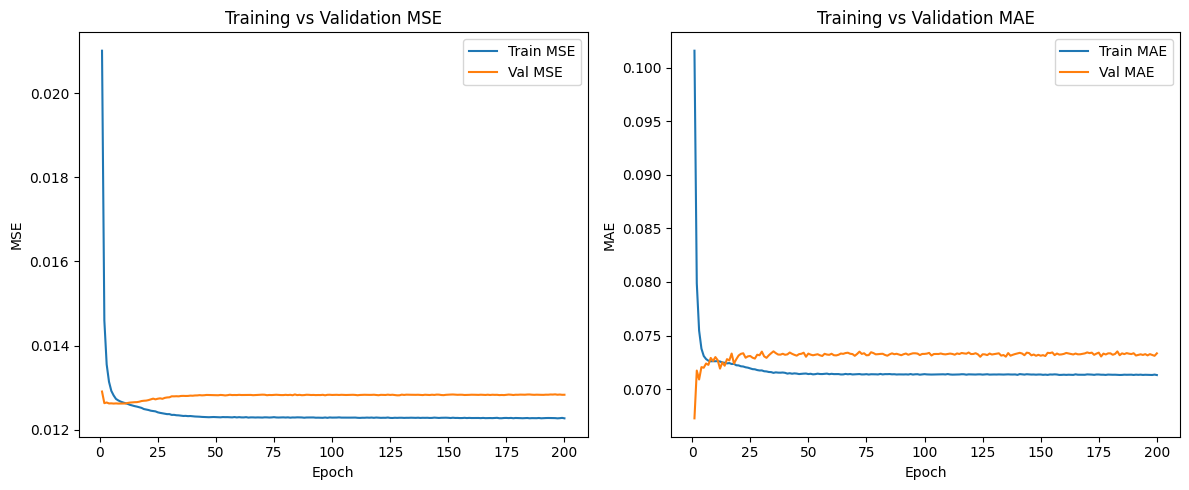

In [61]:
import matplotlib.pyplot as plt
import torch

# === Plot Training History ===
def plot_history(history):
    epochs = range(1, len(history["train_mse"]) + 1)

    plt.figure(figsize=(12,5))

    # Plot MSE
    plt.subplot(1,2,1)
    plt.plot(epochs, history["train_mse"], label="Train MSE")
    plt.plot(epochs, history["val_mse"], label="Val MSE")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title("Training vs Validation MSE")
    plt.legend()

    # Plot MAE
    plt.subplot(1,2,2)
    plt.plot(epochs, history["train_mae"], label="Train MAE")
    plt.plot(epochs, history["val_mae"], label="Val MAE")
    plt.xlabel("Epoch")
    plt.ylabel("MAE")
    plt.title("Training vs Validation MAE")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call after training
plot_history(history)


In [31]:
from torch import nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = DenseNetLSTM()
checkpoint = torch.load("non_balanced_DenseNetLstm.pt", map_location=device)
if "model_state_dict" in checkpoint:
    model.load_state_dict(checkpoint["model_state_dict"])
else:
    model.load_state_dict(checkpoint)
model.to(device)
model.eval()

DenseNetLSTM(
  (feature_extractor): Sequential(
    (conv0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [35]:
import numpy as np

test_results = evaluate_loss(model, test_loader, nn.SmoothL1Loss(), device=device, return_preds=True)
metrics, preds, targets = test_results

preds_np = preds.cpu().numpy()
targets_np = targets.cpu().numpy()

ss_res = np.sum((targets_np - preds_np) ** 2, axis=0)
ss_tot = np.sum((targets_np - np.mean(targets_np, axis=0)) ** 2, axis=0)
r2_per_class = 1 - ss_res / ss_tot
r2_mean = np.mean(r2_per_class)

print("Test set metrics:")
print(f"MSE: {metrics['mse']:.6f}, MAE: {metrics['mae']:.6f}, RMSE: {metrics['rmse']:.6f}")
print(f"R^2 per class: {r2_per_class}")
print(f"Mean R^2: {r2_mean:.6f}")


Test set metrics:
MSE: 0.012624, MAE: 0.072613, RMSE: 0.112359
R^2 per class: [ 9.4056129e-05  4.0233135e-05  1.1688471e-04 -5.2702427e-04
  4.4852495e-04 -3.6931038e-04 -2.6595592e-04]
Mean R^2: -0.000066


In [58]:
preds_np = preds.cpu().numpy()
targets_np = targets.cpu().numpy()
residuals = preds_np - targets_np
max_samples=10000

preds_np = preds.cpu().numpy()
targets_np = targets.cpu().numpy()
N = preds_np.shape[0]

np.max(preds_np), np.min(preds_np), np.max(targets_np), np.min(targets_np)

(np.float32(0.3093567),
 np.float32(0.23108563),
 np.float32(1.0),
 np.float32(0.0))

Subsampled to 10000 points for visualization


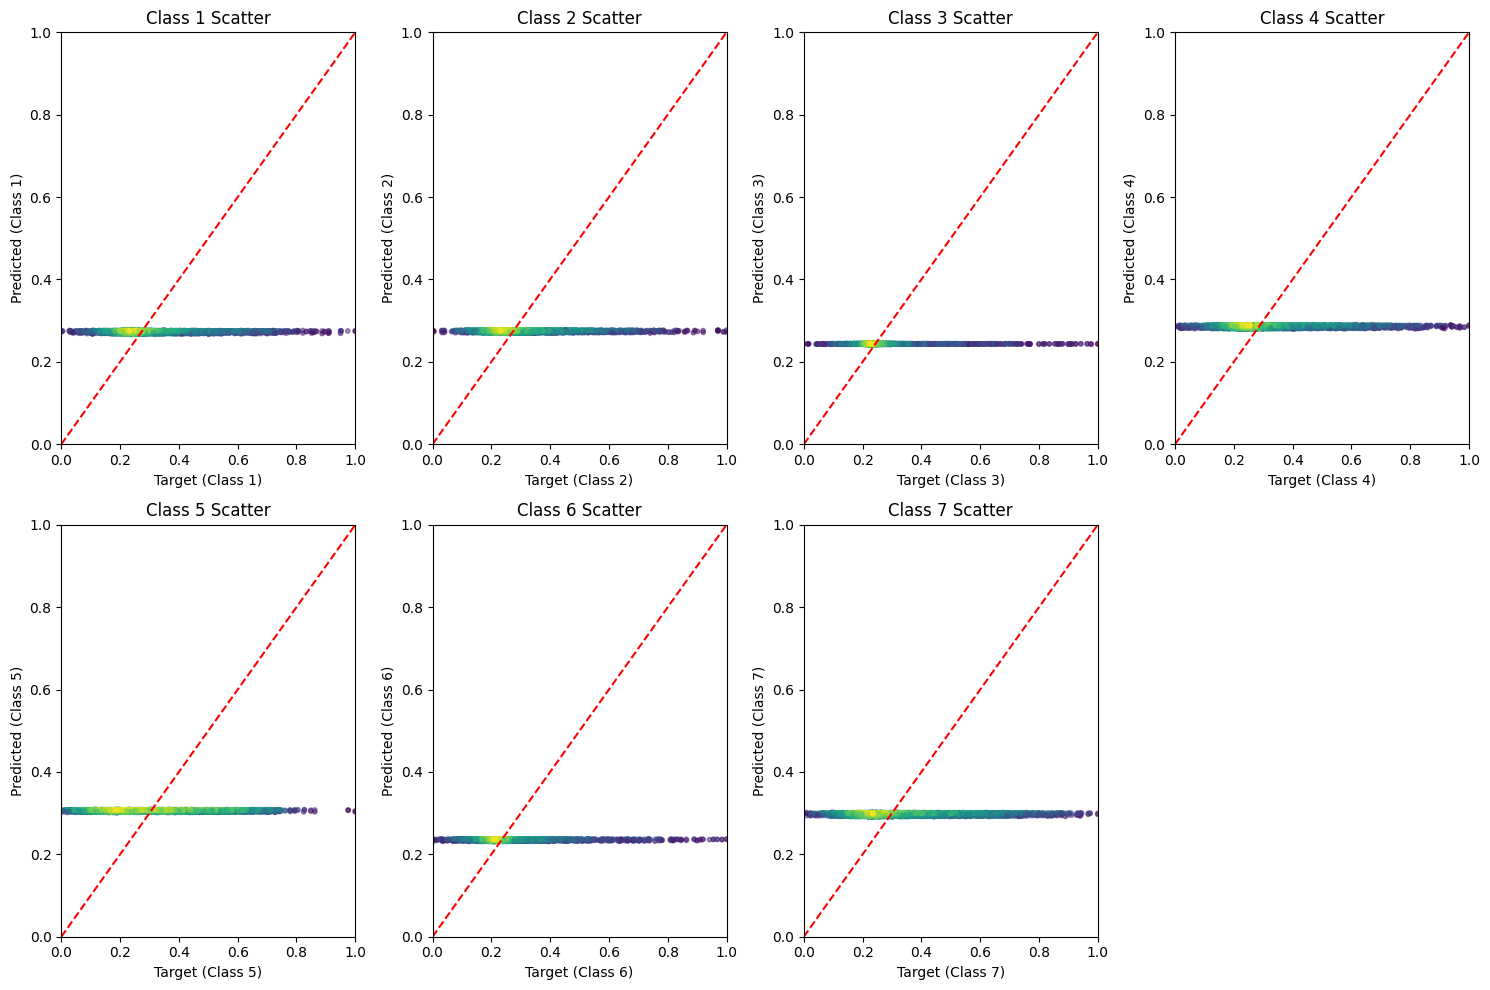

In [ ]:
# Convert to numpy arrays
from scipy.stats import gaussian_kde

if N > max_samples:
    indices = np.random.choice(N, max_samples, replace=False)
    preds_np = preds_np[indices]
    targets_np = targets_np[indices]
    print(f"Subsampled to {max_samples} points for visualization")

# 1. Scatter Plot with Density Coloring (Per Class)
plt.figure(figsize=(15, 10))
for i in range(n_classes):
    plt.subplot(2, 4, i+1)
    x = targets_np[:, i]
    y = preds_np[:, i]
    # Compute density for coloring
    xy = np.vstack([x, y])
    try:
        density = gaussian_kde(xy)(xy)
    except np.linalg.LinAlgError:
        density = np.ones_like(x)  # Fallback if KDE fails
    density = np.log1p(density)  # Log scale for small values
    plt.scatter(x, y, c=density, cmap='viridis', alpha=0.5, s=10)
    plt.plot([0, 1], [0, 1], 'r--')  # Reference line
    plt.xlabel(f"Target (Class {i+1})")
    plt.ylabel(f"Predicted (Class {i+1})")
    plt.title(f"Class {i+1} Scatter")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

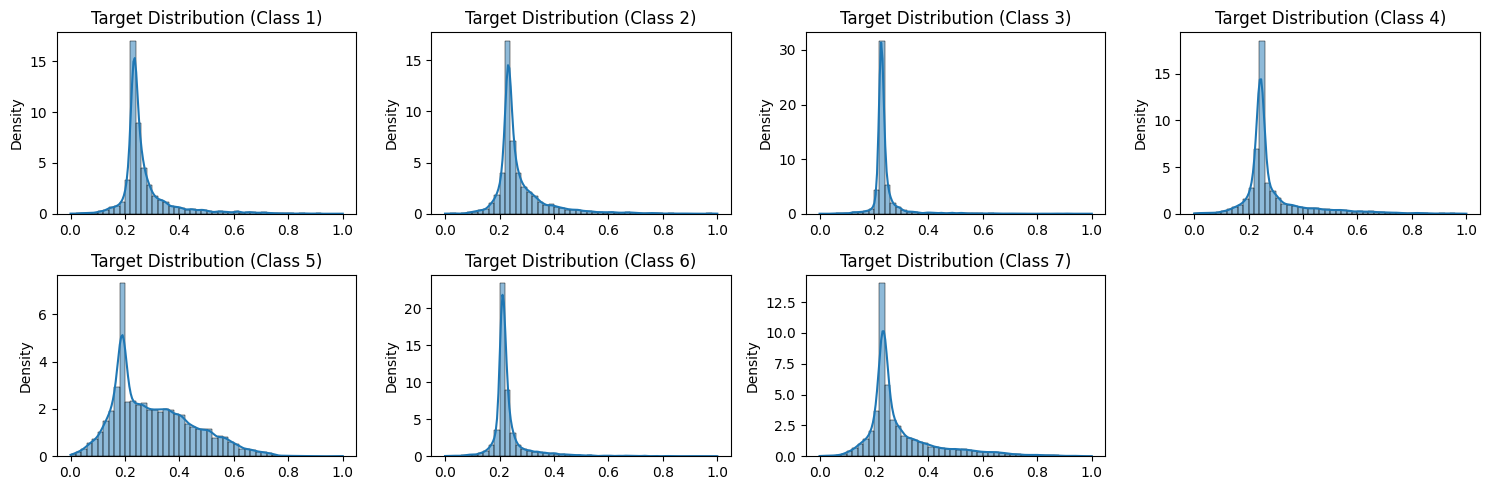

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns  # For KDE; install if needed, but optional
# Assuming Y_windowed_mm is your memory-mapped array (105660, 7)
n_classes = 7
plt.figure(figsize=(15, 5))
for i in range(n_classes):
    y_i = Y_windowed_mm[:, i]  # Access one column (105660,)
    plt.subplot(2, 4, i+1)
    sns.histplot(y_i, bins=50, kde=True, stat="density")
    plt.title(f"Target Distribution (Class {i+1})")
plt.tight_layout()
plt.show()

## 1dcnn model for classification

In [ ]:
Y_tmp = X1.iloc[:, 0:7].to_numpy()  # (5315, 7)
Y_class = np.argmax(Y_tmp, axis=1)  # (5315,)

# Broadcast to all subjects
num_subjects = vox.shape[0]
num_timepoints = vox.shape[1]

# X shape: (num_subjects, num_timepoints, features)
X = vox  # already correct shape

# Y shape: (num_subjects, num_timepoints, 1)
Y = np.tile(Y_class, (num_subjects, 1))[:, :, np.newaxis]

# Optionally flatten for ML: (num_subjects*num_timepoints, features), (num_subjects*num_timepoints, 1)
X_all = X.reshape(-1, X.shape[-1])
Y_all = Y.reshape(-1, 1)

X_all.shape, Y_all.shape

In [ ]:
import torch
# Simple inverse frequency (normalized)
num_classes = len(counts)
inv_freq = 1.0 / counts
class_weights_inv = inv_freq / inv_freq.sum() * num_classes   # normalized to have mean ~1
class_weights_inv = torch.tensor(class_weights_inv, dtype=torch.float32)

# Effective number re-weighting (Cui et al. "Class-Balanced Loss")
beta = 0.9999  # try 0.99 .. 0.9999 (higher -> more extreme reweighting for large datasets)
effective_num = 1.0 - np.power(beta, counts)
class_weights_eff = (1.0 - beta) / effective_num
class_weights_eff = class_weights_eff / np.sum(class_weights_eff) * num_classes
class_weights_eff = torch.tensor(class_weights_eff, dtype=torch.float32)

print("inv weights:", class_weights_inv)
print("effective weights:", class_weights_eff)


In [89]:

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split

class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)   # shape (569, 32, 974)
        self.y = torch.tensor(y, dtype=torch.float32)   # shape (569, 7) → soft labels
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        X_item = self.X[idx].unsqueeze(0)  # add channel dim: [1, 32, 974]
        y_item = self.y[idx]
        return X_item, y_item

    
class Emotion1DCNN(nn.Module):
    def __init__(self, num_classes=7):
        super().__init__()
        # Input: (N, 1, 1163)

        # Block 1
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=120, kernel_size=5, padding=2)  # -> (N,120,1163)
        self.bn1   = nn.BatchNorm1d(120)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)  # -> (N,120,581)

        # Block 2
        self.conv2 = nn.Conv1d(in_channels=120, out_channels=32, kernel_size=3, padding=1)  # -> (N,32,581)
        self.bn2   = nn.BatchNorm1d(32)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)  # -> (N,32,290)

        # Flatten size: 32 * 290
        self.fc1 = nn.Linear(32 * 290, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # x: [batch, 1, 32, 974]
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = x.flatten(1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x #F.log_softmax(x, dim=1)


In [129]:
def evaluate(model, data_loader, device="cpu"):
    model.eval()
    val_loss = 0
    correct = 0
    
    with torch.no_grad():
        all_preds, all_targets = [],[]
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).long()
            outputs = model(X_batch)
            #loss += soft_cross_entropy(outputs, y_batch).item() * X_batch.size(0)
            loss = nn.functional.cross_entropy(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)
            preds = outputs.argmax(dim=1)
            targets = y_batch#.argmax(dim=1)
            correct += (preds == targets).sum().item()

            all_preds.append(preds.cpu())
            all_targets.append(targets )

    all_preds = torch.cat(all_preds).numpy()
    all_targets = torch.cat(all_targets).numpy()
    
    avg_loss = val_loss / len(data_loader.dataset)
    accuracy = correct / len(data_loader.dataset)
    return accuracy, avg_loss, all_preds, all_targets

#def soft_cross_entropy(pred, target):
    """
    pred: log-probs [batch, num_classes]
    target: probs [batch, num_classes]
    """
 #   return torch.mean(torch.sum(-target * pred, dim=1))

In [ ]:
def train_model(model, train_loader, val_loader, optimizer, num_epochs=200, device="cpu", patience=25):
    model.to(device)
    best_val_loss = float("inf")
    patience_counter = 0
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=5)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        correct = 0
        
        for X_batch, y_batch in train_loader:
            # [batch,1 tr, 1163 (voxel)]
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).long()
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = nn.functional.cross_entropy(outputs, y_batch)
            #loss = soft_cross_entropy(outputs, y_batch)
            loss.backward()
            
            # gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
            optimizer.step()
            
            train_loss += loss.item() * X_batch.size(0)
            preds = outputs.argmax(dim=1)
            targets = y_batch
            correct += (preds == targets).sum().item()
        
        train_acc = correct / len(train_loader.dataset)
        val_acc, val_loss, _ ,_ = evaluate(model, val_loader, device)
        scheduler.step(val_loss)
        
        print(f"Epoch {epoch+1}/{num_epochs} "
              f"Train Loss: {train_loss/len(train_loader.dataset):.4f} "
              f"Train Acc: {train_acc:.4f} "
              f"Val Loss: {val_loss:.4f} "
              f"Val Acc: {val_acc:.4f}")
        
        # early stopping
        if val_loss < best_val_loss - 1e-4:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), "best_model.pth")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break

In [ ]:
import numpy as np
import torch
from torch.utils.data import Subset, DataLoader, WeightedRandomSampler
from sklearn.model_selection import train_test_split

test_frac = 0.10   # 10% test
val_frac  = 0.10   # 10% val
batch_size = 64
num_workers = 0
pin_memory = True
random_state = 42

Y_all = np.array(Y_all).ravel()
N = len(Y_all)
assert N == X_all.shape[0], "X_all and Y_all must have same length"


idxs = np.arange(N)


train_val_idx, test_idx, y_train_val, y_test = train_test_split(
    idxs, Y_all, test_size=test_frac, stratify=Y_all, random_state=random_state
)

val_frac_rel = val_frac / (1.0 - test_frac)

train_idx, val_idx, y_train, y_val = train_test_split(
    train_val_idx, y_train_val, test_size=val_frac_rel, stratify=y_train_val, random_state=random_state
)

print("Sizes -> full:", N, "train:", len(train_idx), "val:", len(val_idx), "test:", len(test_idx))

# build Dataset / Subset objects

full_dataset = EmotionDataset(X_all, Y_all)   

train_dataset = Subset(full_dataset, train_idx)
val_dataset   = Subset(full_dataset, val_idx)
test_dataset  = Subset(full_dataset, test_idx)

# build per-class inverse-frequency weights (for sampler) 
unique, counts_from_data = np.unique(Y_all, return_counts=True)
print("Label distribution (overall):", dict(zip(unique, counts_from_data)))

counts_arr = np.zeros(unique.max()+1, dtype=np.float32)
counts_arr[unique] = counts_from_data

inv_freq = 1.0 / counts_arr   # shape (C,)

full_sample_weights = inv_freq[Y_all]                # shape (N,)
train_sample_weights = full_sample_weights[train_idx]  # shape (len(train_dataset),)

train_sample_weights = torch.from_numpy(train_sample_weights).double()

sampler = WeightedRandomSampler(weights=train_sample_weights,
                                num_samples=len(train_sample_weights),   # epoch size
                                replacement=True)

# DataLoaders 
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler,
                          num_workers=num_workers, pin_memory=pin_memory)

val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                        num_workers=num_workers, pin_memory=pin_memory)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                         num_workers=num_workers, pin_memory=pin_memory)

assert len(train_dataset) == len(train_idx)
assert len(val_dataset)   == len(val_idx)
assert len(test_dataset)  == len(test_idx)
assert len(train_sample_weights) == len(train_dataset)

print("Done. Example: first train indices:", train_idx[:10])


Sizes -> full: 106300 train: 85040 val: 10630 test: 10630
Label distribution (overall): {0: 18220, 1: 6560, 2: 3140, 3: 11420, 4: 46760, 5: 4460, 6: 15740}
Done. Example: first train indices: [ 1831 47737 20591  8131 50732  2586 23955  7782 16197 51655]


In [114]:
# Model, loss, optimizer
model = Emotion1DCNN(num_classes=num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Train
train_model(model, train_loader, val_loader, optimizer, num_epochs=200)

Epoch 1/200 Train Loss: 1.9478 Train Acc: 0.1439 Val Loss: 1.9523 Val Acc: 0.0295
Epoch 2/200 Train Loss: 1.9463 Train Acc: 0.1430 Val Loss: 1.9504 Val Acc: 0.0295
Epoch 3/200 Train Loss: 1.9461 Train Acc: 0.1420 Val Loss: 1.9489 Val Acc: 0.1714
Epoch 4/200 Train Loss: 1.9461 Train Acc: 0.1434 Val Loss: 1.9460 Val Acc: 0.1714
Epoch 5/200 Train Loss: 1.9459 Train Acc: 0.1417 Val Loss: 1.9454 Val Acc: 0.0394
Epoch 6/200 Train Loss: 1.9444 Train Acc: 0.1511 Val Loss: 1.9453 Val Acc: 0.0704
Epoch 7/200 Train Loss: 1.9393 Train Acc: 0.1590 Val Loss: 1.9351 Val Acc: 0.0727
Epoch 8/200 Train Loss: 1.9285 Train Acc: 0.1749 Val Loss: 1.9427 Val Acc: 0.0583
Epoch 9/200 Train Loss: 1.9150 Train Acc: 0.1847 Val Loss: 1.9391 Val Acc: 0.0530
Epoch 10/200 Train Loss: 1.8961 Train Acc: 0.1954 Val Loss: 1.9284 Val Acc: 0.0605
Epoch 11/200 Train Loss: 1.8767 Train Acc: 0.2042 Val Loss: 1.9212 Val Acc: 0.0702
Epoch 12/200 Train Loss: 1.8531 Train Acc: 0.2144 Val Loss: 1.9216 Val Acc: 0.0717
Epoch 13/200 

c:\Users\NA\.conda\envs\eeg_study\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



📊 sub_2 Metrics:
Accuracy  : 0.1388
Precision : 0.2627
Recall    : 0.1388
F1 Score  : 0.1433

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.17      0.17      1822
           1       0.06      0.18      0.09       656
           2       0.03      0.06      0.04       314
           3       0.12      0.22      0.15      1142
           4       0.43      0.08      0.14      4676
           5       0.05      0.13      0.07       446
           6       0.15      0.21      0.18      1574

    accuracy                           0.14     10630
   macro avg       0.15      0.15      0.12     10630
weighted avg       0.26      0.14      0.14     10630



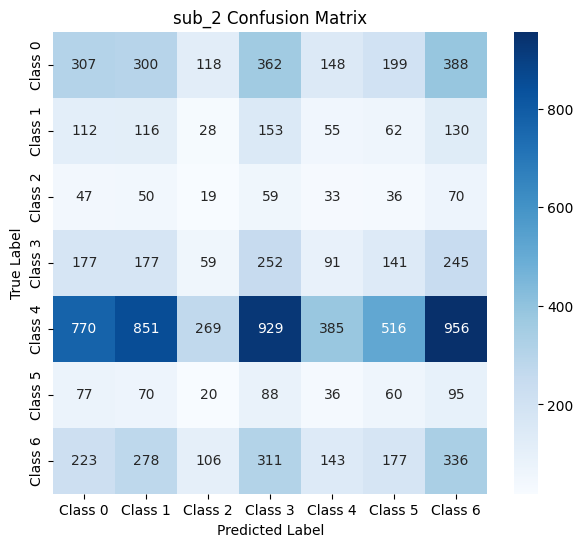

In [130]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

accuracy, loss, all_preds, all_targets = evaluate(model,test_loader)

acc = accuracy_score(all_targets, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_preds, average="weighted", zero_division=0)

print(f"\n📊 sub_2 Metrics:")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nClassification Report:\n", classification_report(all_targets, all_preds, zero_division=0))

# Confusion Matrix Heatmap
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[f"Class {i}" for i in range(cm.shape[0])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])
plt.title(f"sub_2 Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

- find better model

In [ ]:
from torch.utils.data import  WeightedRandomSampler
N, seq_len, features, num_classes = X_all.shape[0], 32, 974, 7
dataset = EmotionDataset(X, Y)

# Train/Val split (80/20)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# WeightedRandomSampler (balance training batches)
#inv_freq = 1.0 / counts  # or use class_weights_inv.numpy()
#sample_weights = inv_freq[Y_all].flatten()# per-sample weight array

#sample_weights = torch.from_numpy(sample_weights).double()  # WeightedRandomSampler expects float-like
#sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

#train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# Model, loss, optimizer
model = Emotion2DCNN(num_classes=num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Train
train_model(model, train_loader, val_loader, optimizer, num_epochs=200)


IndexError: list index out of range

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import datasets, image, masking, plotting
from nilearn.glm.first_level import FirstLevelModel

fmri_img_2 = "//wsl.localhost/Ubuntu/home/jirapong/brain_im/sub-2/func/sub-2_task-500daysofsummer_bold_blur_censor_ica.nii.gz"   
t_r = 1.0                                         
confounds_tsv = None                              
output_dir = "seed_glm_results"  # your preprocessed fMRI data
os.makedirs(output_dir, exist_ok=True)

img_2 = image.load_img(fmri_img_2)
n_scans = img_2.shape[-1]
frame_times = np.arange(n_scans) * t_r

from function.function_ import mask_from_labels
from nilearn.input_data import NiftiMasker

# resample masks to functional image
amyg_mask_2 = image.resample_to_img(amyg_mask_sub, img_2, interpolation="nearest")
insula_mask_2 = image.resample_to_img(insula_mask_cort, img_2, interpolation="nearest")

# create masker object to extract ROI
amyg_masker_2 = NiftiMasker(mask_img=amyg_mask_2, standardize=True, t_r=t_r)
ins_masker_2  = NiftiMasker(mask_img=insula_mask_2, standardize=True, t_r=t_r)

# extractr ROIs
amyg_ts_2 = amyg_masker_2.fit_transform(img_2).squeeze()
ins_ts_2  = ins_masker_2.fit_transform(img_2).squeeze()
vox_ts = np.hstack((amyg_ts_2,ins_ts_2))
vox_ts = vox_ts[62:5377]

# extract feature from each emotional class and construct probability matrix

stimulus_marker = pd.DataFrame(new_run_id[:,0:7])
lables = [0,1,2,3,4,5,6]
X_all = []
Y_all = []
X = []
Y = []
for label in lables:
    col_ids = stimulus_marker[label]
    for run in range(1, col_ids.max() + 1):
        run_indices = np.where(col_ids == run)[0]
        if len(run_indices) != 32:
            continue

        Y_tmp = X1.iloc[run_indices[0]:run_indices[-1]+1,:]
        Y_tmp = Y_tmp.iloc[:,0:7]
        Y_prob = cal_prob(Y_tmp)

        X_tmp = vox_ts[run_indices[0]:run_indices[-1]+1,:]
        X_tmp = np.array(X_tmp)[np.newaxis,:]
        if len(X) == 0:
            X = X_tmp
            Y = Y_prob
        else:
            X = np.concatenate((X,X_tmp), axis = 0)
            Y = np.concatenate((Y,Y_prob))
    
    if len(X_all) == 0:
        X_all = X
        Y_all = Y
    else:
        X_all = np.concatenate((X_all,X), axis = 0)
        Y_all = np.concatenate((Y_all,Y), axis = 0)


C:\Users\NA\AppData\Local\Temp\ipykernel_12576\3835561507.py:21: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  amyg_mask_2 = image.resample_to_img(amyg_mask_sub, img_2, interpolation="nearest")
C:\Users\NA\AppData\Local\Temp\ipykernel_12576\3835561507.py:21: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  amyg_mask_2 = image.resample_to_img(amyg_mask_sub, img_2, interpolation="nearest")
C:\Users\NA\AppData\Local\Temp\ipykernel_12576\3835561507.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  insula_mask_2 = image.resample_to_img(insula_mask_cort, img_2, interpolation="nearest")
C:\Users\NA\

In [65]:
X_all.shape, Y_all.shape

((1718, 32, 974), (1718, 7))

In [86]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
def predict(model, data_loader, device="cpu"):
    model.eval()
    all_probs = []
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)                   # log-probs
            probs = torch.exp(outputs)                 # convert log-probs → probabilities
            preds = probs.argmax(dim=1)                # predicted class
            
            all_probs.append(probs.cpu())
            all_preds.append(preds.cpu())
            all_targets.append(y_batch.cpu())
    
    all_probs = torch.cat(all_probs, dim=0)
    all_preds = torch.cat(all_preds, dim=0)
    all_targets = torch.cat(all_targets, dim=0)
    
    return all_probs, all_preds, all_targets

def evaluate_model(model, data_loader, device="cpu", set_name="Validation"):
    model.eval()
    loss = 0
    
    with torch.no_grad():
        all_probs, all_preds, all_targets = [], [], []
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            if X_batch.dim() == 3:  
                X_batch = X_batch.unsqueeze(1)
            outputs = model(X_batch)
            probs = torch.exp(outputs)              # probabilities
            preds = probs.argmax(dim=1)             # predicted class

            all_probs.append(probs.cpu())
            all_preds.append(preds.cpu())
            all_targets.append(y_batch.unsqueeze(0).argmax(dim=1) )

    all_probs = torch.cat(all_probs).numpy()
    all_preds = torch.cat(all_preds).numpy()
    all_targets = torch.cat(all_targets).numpy()

    return all_preds, all_probs, all_targets
    '''
    acc = accuracy_score(all_targets, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_preds, average="weighted", zero_division=0)
    
    print(f"\n📊 {set_name} Metrics:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print("\nClassification Report:\n", classification_report(all_targets, all_preds, zero_division=0))
    
    # Confusion Matrix Heatmap
    cm = confusion_matrix(all_targets, all_preds)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=[f"Class {i}" for i in range(cm.shape[0])],
                yticklabels=[f"Class {i}" for i in range(cm.shape[0])])
    plt.title(f"{set_name} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    
    return acc, precision, recall, f1
    '''

from torch.utils.data import DataLoader, TensorDataset
#X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)   # (N, 1, 32, 974)
#y_tensor = torch.tensor(Y, dtype=torch.long)            # (N,)

#test_data = TensorDataset(X_tensor, y_tensor)

test_loader = EmotionDataset(X_all,Y_all)
all_preds, all_probs, all_targets = evaluate_model(model, test_loader, device="cpu", set_name="Test")

In [87]:
all_targets.shape, all_preds.shape, all_probs.shape

((1718,), (1718,), (1718, 7))


📊 sub_2 Metrics:
Accuracy  : 0.7247
Precision : 0.5252
Recall    : 0.7247
F1 Score  : 0.6090

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00       101
           4       0.72      1.00      0.84      1245
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00       192

    accuracy                           0.72      1718
   macro avg       0.10      0.14      0.12      1718
weighted avg       0.53      0.72      0.61      1718



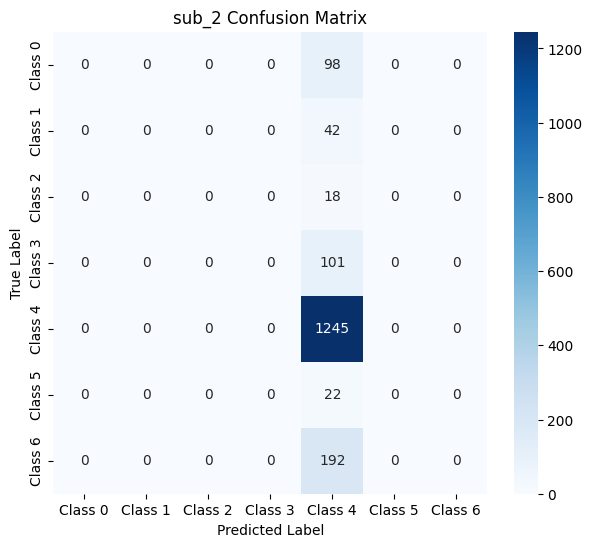

In [88]:
acc = accuracy_score(all_targets, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_preds, average="weighted", zero_division=0)

print(f"\n📊 sub_2 Metrics:")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nClassification Report:\n", classification_report(all_targets, all_preds, zero_division=0))

# Confusion Matrix Heatmap
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[f"Class {i}" for i in range(cm.shape[0])],
            yticklabels=[f"Class {i}" for i in range(cm.shape[0])])
plt.title(f"sub_2 Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()